In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [9]:
df = pd.read_csv('spambase_csv.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Explore Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [11]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<Axes: >

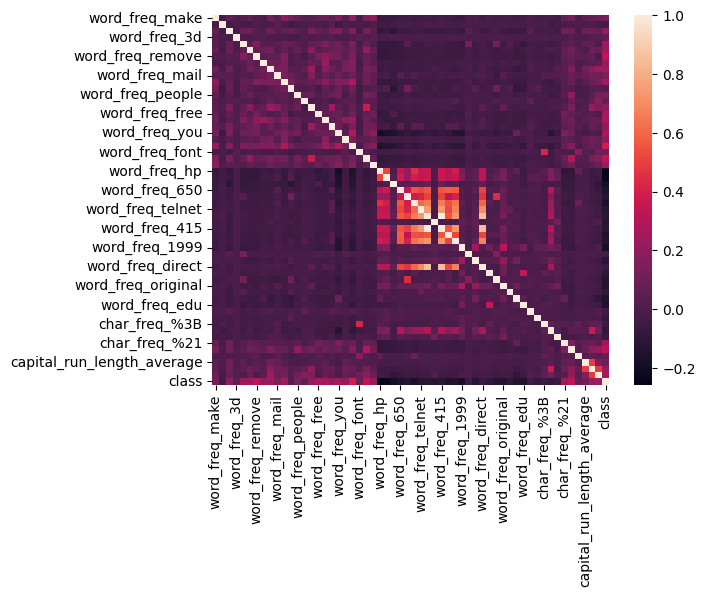

In [12]:
sns.heatmap(df.corr())

In [14]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [15]:
df.duplicated().sum()

391

Separate Features and Target

In [16]:
X = df.drop('class', axis=1)
y = df['class']

In [17]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [18]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


Scaling Features

In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X[:10])

[[0.00000000e+00 4.48179272e-02 1.25490196e-01 0.00000000e+00
  3.20000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.61840745e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.60000000e-02
  0.00000000e+00 1.41914191e-01 1.02933333e-01 0.00000000e+00
  8.64086409e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.39546770e-02
  0.00000000e+00 0.00000000e+00 2.50204267e-03 6.00720865e-03
  1.74873737e-02]
 [4.62555066e-02 1.96078431e-02 9.80392157e-02 0.00000000e+00
  1.40000000e-02 4.76190476e-02 2.88858322e-02 6.300

Splitting Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3680, 57)
X_test:  (921, 57)
y_train:  (3680,)
y_test:  (921,)


Fit Logistic Regression

In [22]:
lr = LogisticRegression(penalty='l2', solver='sag', C=1.0, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='sag')

In [23]:
print('LR Train Score: ', lr.score(X_train, y_train))
print('LR Test Score: ', lr.score(X_test, y_test))
print('LR Classes: ', lr.classes_)
print('Num LR Iter: ', lr.n_iter_)

LR Train Score:  0.8899456521739131
LR Test Score:  0.8946796959826275
LR Classes:  [0 1]
Num LR Iter:  [21]


Fit MLP Classifier

In [24]:
mlpc = MLPClassifier(activation='relu', solver='lbfgs', learning_rate='constant', alpha=0.0001, hidden_layer_sizes=(100, 10), max_iter=200, random_state=42)
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 10), random_state=42, solver='lbfgs')

In [27]:
print('MLPC Test Score: ', mlpc.score(X_test, y_test))
print('MLPC Train Score: ', mlpc.score(X_train, y_train))
print('MLPC Loss: ', mlpc.loss_)
print('MLPC Iter Nums: ', mlpc.n_iter_)
print('MLPC Num of Layers: ', mlpc.n_layers_)
print('MLPC last activation: ', mlpc.out_activation_)

MLPC Test Score:  0.9381107491856677
MLPC Train Score:  0.9532608695652174
MLPC Loss:  0.11949560872277183
MLPC Iter Nums:  200
MLPC Num of Layers:  4
MLPC last activation:  logistic


Fit RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [29]:
print('Random Forest Classifier Train Score: ', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score: ', rfc.score(X_test, y_test))
print('Random Forest Classifier Features Importance: ', rfc.feature_importances_)

Random Forest Classifier Train Score:  0.9934782608695653
Random Forest Classifier Test Score:  0.9543973941368078
Random Forest Classifier Features Importance:  [0.00557184 0.00416801 0.01309116 0.00114717 0.02493317 0.00791822
 0.08898712 0.01814179 0.0044665  0.00725242 0.00483126 0.01142001
 0.00295761 0.00214418 0.00122446 0.06760309 0.01399116 0.00742836
 0.02890137 0.00670472 0.04817738 0.00278386 0.02955842 0.027575
 0.04391274 0.01410856 0.02703615 0.00504821 0.00216704 0.00414799
 0.00301564 0.00065672 0.00223551 0.00051665 0.0029634  0.00351818
 0.01340479 0.00053134 0.00287418 0.0013313  0.00080106 0.00433072
 0.00199449 0.00211062 0.00882987 0.01632884 0.00016193 0.00154425
 0.00468817 0.0115923  0.00228383 0.1164799  0.10344085 0.00310631
 0.06124068 0.05637312 0.04624637]


Fit KNeighborsClassifier

In [30]:
knc = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [31]:
print('KNeighborsClassifier Train Score: ', knc.score(X_train, y_train))
print('KNeighborsClassifier Test Score: ', knc.score(X_test, y_test))

KNeighborsClassifier Train Score:  0.9994565217391305
KNeighborsClassifier Test Score:  0.8968512486427795


Predict with RandomForestClassifier

In [33]:
y_pred = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)

Confusion Matrix

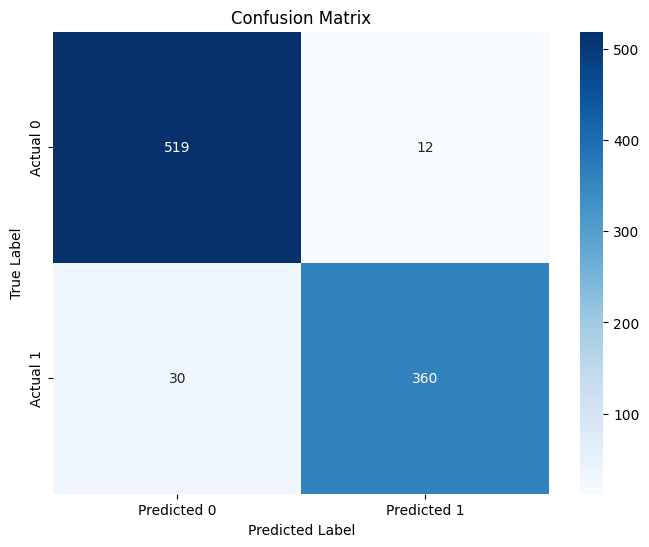

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy Score

In [35]:
ac = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score: ', ac)

Accuracy Score:  0.9543973941368078


F1 Score

In [36]:
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 Score: ', f1)

F1 Score:  0.9543973941368078


Recall Score

In [37]:
rc = recall_score(y_test, y_pred, average='micro')
print('Recall Score: ', rc)

Recall Score:  0.9543973941368078


Precision Score

In [38]:
ps = precision_score(y_test, y_pred, average='micro')
print('Precision Score: ', ps)

Precision Score:  0.9543973941368078


Precision Recall Curve

In [42]:
pv, rv, tv = precision_recall_curve(y_test, y_pred)
print('Precision Value: ', pv)
print('Recall Value: ', rv)
print('Threshold Value: ', tv)

Precision Value:  [0.42345277 0.96774194 1.        ]
Recall Value:  [1.         0.92307692 0.        ]
Threshold Value:  [0 1]


ROC AUC Score

In [44]:
ra = roc_auc_score(y_test, y_pred, average='micro')
print('ROC AUC Score: ', ra)

ROC AUC Score:  0.950239026510213


Save Prediction to CSV

In [45]:
fin = pd.DataFrame(y_pred, columns=['prediction'])
fin.to_csv('prediction.csv', index=False)

In [46]:
fin

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
916,1
917,0
918,0
919,1
